# Tarea 3 - Rodrigo Vílchez B78292

### Descripción
El presente dataset, obtenido de *Kaggle*, posee datos de observaciones del espacio visible realizadas por SDSS. Cada observación se trata de galaxias, estrellas o cuásares (la cual será la variable de respuesta), y están originalmente descritas por 17 distintas variables que se refieren a métricas obtenidas al momento de realizar la observación en cuanto a filtros, ángulos, etc. El dataset lo contemplan alrededor de 100.000 observaciones. 
El dataset cambió en comparación con la tarea anterior pues su manejo era muy complicado ya desde la tarea pasada, por lo que todo el análisis se hizo desde cero. (se habló con el asistente)

### Preprocesamiento y Limpieza de Datos
El primer paso fue transformar en números todas las variables categóricas, en este caso, el dataset solo contiene una columna de este tipo y es la que clasifica a la observación como galaxia (se transformó a 1) y cuásar (convertido en 0). Se verificó si habían datos con variables en blanco y se eliminó aquellas columnas que le otorgaban un identificador único a la observación, ya que no son útiles para entrenar un modelo y ayudarlo a clasificar una observación.

### Análisis Exploratorio de Datos
Cargar los datos utilizando la librería *pandas* y visualizar los datos con ayuda de *ggplot*.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
# plt.style.use('ggplot')

dataset = 'https://raw.githubusercontent.com/rigovil/ci0163/main/tareas/tarea_3/dataset_binario.csv'
observaciones = pd.read_csv(dataset, sep=',')

Descripción general estadísticas de las variables presentes en el dataset y primeras tres observaciones.

In [51]:
observaciones.describe()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
count,78406.000000,78406.000000,78406.000000,78406.000000,78406.000000,78406.000000,78406.000000,78406.000000,78406.0,78406.000000,78406.000000,7.840600e+04,78406.000000,78406.000000,78406.000000,78406.000000,78406.000000
mean,178.564041,24.310674,22.335933,20.910960,19.838219,19.233885,18.888702,4530.474670,301.0,3.493801,187.837245,6.047177e+18,0.735512,5370.859552,55714.648318,460.106905,0.758169
std,95.531566,19.432780,2.150972,1.922379,1.773199,1.704196,1.724996,1970.721529,0.0,1.574923,149.079073,3.352836e+18,0.751086,2977.902009,1828.217999,276.051943,0.428195
min,0.005528,-15.980904,10.996230,12.679020,11.746640,11.299560,10.897380,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000,0.000000
25%,130.966063,5.588466,20.712290,19.594155,18.609452,18.089780,17.742095,3225.000000,301.0,2.000000,83.000000,3.096253e+18,0.256198,2750.000000,54533.000000,226.000000,1.000000
50%,181.928863,23.733977,22.407380,21.383080,20.311500,19.532460,19.112775,4192.000000,301.0,4.000000,148.000000,5.965182e+18,0.532256,5298.000000,56013.000000,445.000000,1.000000
75%,232.169937,39.895229,23.836350,22.261197,21.137583,20.479067,19.956543,5323.000000,301.0,5.000000,245.000000,8.559307e+18,0.835665,7602.000000,56984.000000,673.000000,1.000000
max,359.999615,82.288657,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,937.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000,1.000000


In [52]:
observaciones.head(3)

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,1
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,1
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,1


#### Distribución por clase

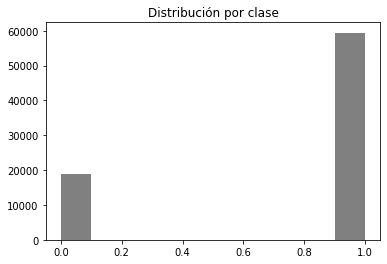

In [53]:
plt.title('Distribución por clase')
plt.hist(observaciones['class'], color='gray')
plt.show()

El gráfico anterior muestra cómo existen muchas más observaciones que corresponden a galaxias, para cuásares la cantidad de observaciones es mucho menor.

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

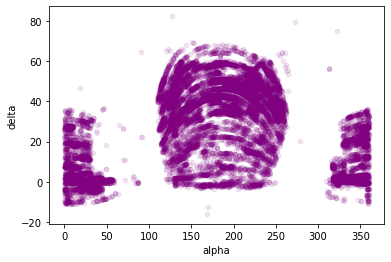

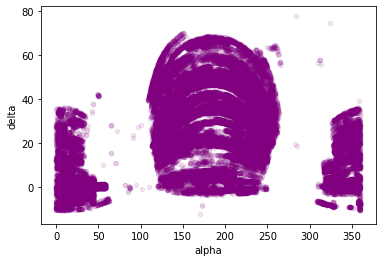

In [54]:
observaciones.groupby('class').plot(x='alpha', y='delta', kind = 'scatter', color = 'purple', alpha = 0.1)

Los gráficos anteriores muestran la relación que existe entre el valor *alpha* y *delta* para cada observación dividida por clase. Se observa que se tiende a usar ciertos valores de *delta* para ciertos valores de *alpha*, que corresponden al ángulo de ascenso y declinación de la observación.

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

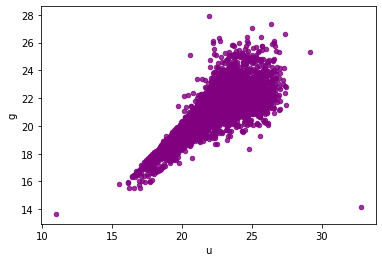

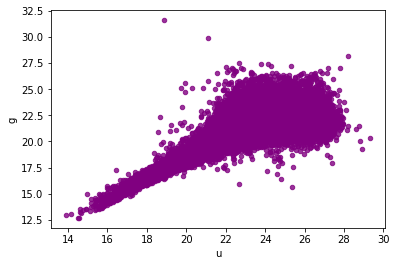

In [55]:
observaciones.groupby('class').plot(x='u', y='g', kind = 'scatter', color = 'purple', alpha = 0.8)

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

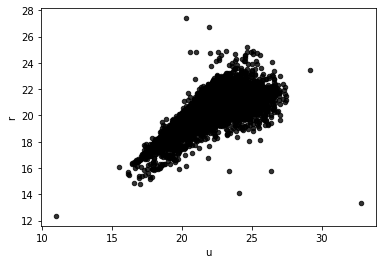

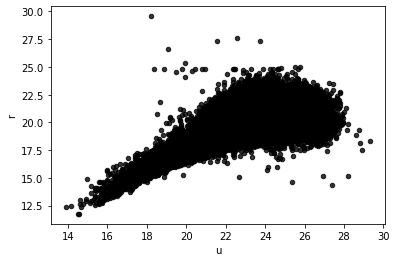

In [56]:
observaciones.groupby('class').plot(x='u', y='r', kind = 'scatter', color = 'black', alpha = 0.8)

Los gráficos anteriores ayudan a ver la relación que existen entre los filtros utilizados para encontrar cada observación, ya sea galaxia o cuásar. La tendencia parece utilizar filtros rojos y verdes similares para cada filtro ultravioleta en las observaciones de galaxias y cuásares.

### Selección de Atributos 

#### Feature Importance
Se construye un *ExtraTreeClassifier* para evaluar la importancia de las variables y su influencia en la variable que se quiere predecir, el cual es la clase de la observación.

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

array = observaciones.values
X = array[:,0:16]
Y = array[:,16]
model = ExtraTreesClassifier(n_estimators=20)
model.fit(X,Y)

i = 0
columnas = list(observaciones.keys())
diccionario = {}
for variable in model.feature_importances_:
  diccionario[columnas[i]] = variable
  i+=1

diccionario = sorted(diccionario.items(), key=lambda x: x[1], reverse=True)
for valor in diccionario:
  print(valor)


('redshift', 0.438159244254732)
('u', 0.10480093845391128)
('g', 0.08339128115016857)
('z', 0.07956103431163997)
('r', 0.05539842316592072)
('i', 0.05399508276631171)
('plate', 0.04424780896158438)
('MJD', 0.03566090705232691)
('spec_obj_ID', 0.03091198469647475)
('delta', 0.016914582008946653)
('alpha', 0.014695934679477071)
('run_ID', 0.011987853026766138)
('fiber_ID', 0.011004858922169694)
('field_ID', 0.010507078476850366)
('cam_col', 0.008762988072719892)
('rerun_ID', 0.0)


Según esta técnica, las variables que más influyen en la clasificación de una observación son *redshift* y los filtros utilizados al momento de usar la toma, excepto el filtro rojo (*r*).

#### Univariate Selection
Se busca recursivamente cuál conjunto de atributos funciona mejor al momento de predecir la variable de respuesta, eliminando y construyendo modelos con los atributos restantes.

In [26]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

array = observaciones.values
X = array[:,0:16]
Y = array[:,16]
test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(X, Y)

i = 0
columnas = list(observaciones.keys())
diccionario = {}
for variable in fit.scores_:
  diccionario[columnas[i]] = variable
  i+=1

diccionario = sorted(diccionario.items(), key=lambda x: x[1], reverse=True)
for valor in diccionario:
  print(valor)

('rerun_ID', nan)
('redshift', 94923.9245408989)
('z', 20039.061756697192)
('i', 14650.269044361803)
('plate', 7651.208814499924)
('spec_obj_ID', 7651.201808211597)
('MJD', 6774.390758169013)
('r', 5240.54022461797)
('u', 3509.419185203759)
('delta', 415.41430432887745)
('fiber_ID', 289.7990643276898)
('field_ID', 111.56892418158256)
('run_ID', 17.568124644189233)
('alpha', 10.00097547549951)
('cam_col', 8.301178695261434)
('g', 1.5702860007241217)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Esta técnica arroja resultados relativamente diferentes, aunque resalta la importancia que parece tener la variable *redshift*, así como las variables *z* y *r* que corresponden a unos de los filtros. Las variables *spec_obj_ID* y *plate* también parecen tener relevancia e influencia en la variable de respuesta.

### Redes Neuronales

Las tres distintas arquitecturas de red neuronal deben tener 16 neuronas en la capa de entrada (pues hay 16 variables) y una neurona en la capa de salida (pues es una clasificación binaria y solo produce un resultado: 0, 1).

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

dataset_train = 'https://raw.githubusercontent.com/rigovil/ci0163/main/tareas/tarea_3/dataset_train.csv'
dataset_test = 'https://raw.githubusercontent.com/rigovil/ci0163/main/tareas/tarea_3/dataset_test.csv'
training = pd.read_csv(dataset_train, sep=',')
testing = pd.read_csv(dataset_test, sep=',')

# para entrenamiento de las redes
array = training.values
X = array[:,0:16]
y = array[:,16]

#### Primera Red Neuronal

La primera red neuronal se conforma de:


*   **Capa de entrada:** 16 neuronas
*   Capa oculta I: 12 neuronas
*   Capa oculta II: 8 neuronas
*   Capa oculta III: 4 neuronas
*   Capa oculta IV: 2 neuronas
*   **Capa de salida:** 1 neurona

In [58]:
model = Sequential()
model.add(Dense(12, input_dim=16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(X, y, epochs=5, batch_size=5)

_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/5
10663/10663 [==============================] - 16s 1ms/step - loss: 0.5493 - accuracy: 0.7626
Epoch 2/5
10663/10663 [==============================] - 16s 1ms/step - loss: 0.5489 - accuracy: 0.7626
Epoch 3/5
10663/10663 [==============================] - 16s 2ms/step - loss: 0.5490 - accuracy: 0.7626
Epoch 4/5
10663/10663 [==============================] - 15s 1ms/step - loss: 0.5489 - accuracy: 0.7626
Epoch 5/5
1667/1667 [==============================] - 7s 3ms/step - loss: 0.5481 - accuracy: 0.7626
Accuracy: 76.26


Con el dataset de entrenamiento, esta arquitectura logra obtener una precisión del 76%. La cantidad de *epochs* y *batch_size* son elegidas para que la red no tarde mucho tiempo en entrenarse.

In [72]:
array = testing.values
X_test = array[:,0:16]
y_test = array[:,16]

predictions = (model.predict(X_test) > 0.5).astype(int)
for i in range(10):
	print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y_test[i]))

aciertos = 0
fallos = 0
total = 0

for i in range(len(predictions)):
  if(predictions[i] == y_test[i]):
    aciertos = aciertos+1
  else:
    fallos = fallos+1
  total = total+1

print("----------------------------------------------")
print('Aciertos: ' + str(aciertos))
print('Fallos: ' + str(fallos))
print('Precision: ' + str(aciertos/total))


[142.942988016146, 16.9892002308419, 24.843, 22.20632, 21.65898, 20.77094, 20.22223, 5183.0, 301.0, 3.0, 83.0, 1.07503642953953e+19, 0.8033257, 9548.0, 57785.0, 989.0] => 1 (expected 1)
[135.263303698825, 28.9744014344227, 21.49, 21.10227, 20.61004, 20.54189, 20.29885, 4335.0, 301.0, 5.0, 170.0, 6.508955011124582e+18, 0.9349682, 5781.0, 56337.0, 464.0] => 1 (expected 0)
[201.572312709273, 33.8946826937633, 25.02784, 22.32312, 20.4404, 19.53025, 19.03813, 4576.0, 301.0, 4.0, 540.0, 4.483425602603604e+18, 0.4897552, 3982.0, 55332.0, 335.0] => 1 (expected 1)
[84.0635051413466, -0.749742975413596, 22.50879, 21.14568, 20.36354, 20.07761, 19.89473, 4158.0, 301.0, 2.0, 67.0, 2.332865764035422e+18, 2.032836, 2072.0, 53430.0, 4.0] => 1 (expected 0)
[31.1225755127823, -3.84897972198744, 23.44521, 22.20478, 21.38653, 21.37965, 20.27652, 7865.0, 301.0, 5.0, 122.0, 1.0501468946687089e+19, 0.736698, 9327.0, 57723.0, 729.0] => 1 (expected 1)
[167.318475165197, 37.9585887385657, 24.16212, 22.77856, 20

Una vez entrenada la primera arquitectura de la red neuronal, se utilizó el dataset de testing y la red arrojó resultados obteniendo una precisión del 74%, similar a la que obtuvo cuando se entrenó.

#### Segunda Red Neuronal

La segunda red neuronal se conforma de:


*   **Capa de entrada:** 16 neuronas
*   Capa oculta II: 4 neuronas
*   **Capa de salida:** 1 neurona

In [70]:
model2 = Sequential()
model2.add(Dense(4, input_dim=16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

opt = SGD(learning_rate=0.01, momentum=0.9)
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model2.fit(X, y, epochs=10, batch_size=5)

_, accuracy = model2.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
5019/5019 [==============================] - 8s 2ms/step - loss: nan - accuracy: 0.7486
Epoch 2/10
5019/5019 [==============================] - 7s 1ms/step - loss: 0.5648 - accuracy: 0.7487
Epoch 3/10
5019/5019 [==============================] - 8s 1ms/step - loss: 0.5648 - accuracy: 0.7487
Epoch 4/10
5019/5019 [==============================] - 7s 1ms/step - loss: 0.5647 - accuracy: 0.7487
Epoch 5/10
5019/5019 [==============================] - 7s 1ms/step - loss: 0.5647 - accuracy: 0.7487
Epoch 6/10
5019/5019 [==============================] - 7s 1ms/step - loss: 0.5649 - accuracy: 0.7487
Epoch 7/10
5019/5019 [==============================] - 7s 1ms/step - loss: 0.5647 - accuracy: 0.7487
Epoch 8/10
5019/5019 [==============================] - 7s 1ms/step - loss: 0.5647 - accuracy: 0.7487
Epoch 9/10
5019/5019 [==============================] - 7s 1ms/step - loss: 0.5648 - accuracy: 0.7487
Epoch 10/10
785/785 [==============================] - 1s 1ms/step - loss: 0.5638 - a

In [73]:
array = testing.values
X_test = array[:,0:16]
y_test = array[:,16]

predictions = (model2.predict(X_test) > 0.5).astype(int)
for i in range(10):
	print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y_test[i]))

aciertos = 0
fallos = 0
total = 0

for i in range(len(predictions)):
  if(predictions[i] == y_test[i]):
    aciertos = aciertos+1
  else:
    fallos = fallos+1
  total = total+1

print("----------------------------------------------")
print('Aciertos: ' + str(aciertos))
print('Fallos: ' + str(fallos))
print('Precision: ' + str(aciertos/total))

[142.942988016146, 16.9892002308419, 24.843, 22.20632, 21.65898, 20.77094, 20.22223, 5183.0, 301.0, 3.0, 83.0, 1.07503642953953e+19, 0.8033257, 9548.0, 57785.0, 989.0] => 1 (expected 1)
[135.263303698825, 28.9744014344227, 21.49, 21.10227, 20.61004, 20.54189, 20.29885, 4335.0, 301.0, 5.0, 170.0, 6.508955011124582e+18, 0.9349682, 5781.0, 56337.0, 464.0] => 1 (expected 0)
[201.572312709273, 33.8946826937633, 25.02784, 22.32312, 20.4404, 19.53025, 19.03813, 4576.0, 301.0, 4.0, 540.0, 4.483425602603604e+18, 0.4897552, 3982.0, 55332.0, 335.0] => 1 (expected 1)
[84.0635051413466, -0.749742975413596, 22.50879, 21.14568, 20.36354, 20.07761, 19.89473, 4158.0, 301.0, 2.0, 67.0, 2.332865764035422e+18, 2.032836, 2072.0, 53430.0, 4.0] => 1 (expected 0)
[31.1225755127823, -3.84897972198744, 23.44521, 22.20478, 21.38653, 21.37965, 20.27652, 7865.0, 301.0, 5.0, 122.0, 1.0501468946687089e+19, 0.736698, 9327.0, 57723.0, 729.0] => 1 (expected 1)
[167.318475165197, 37.9585887385657, 24.16212, 22.77856, 20

Esta segunda arquitectura de red neuronal con solo una capa oculta, arrojó los mismos resultados que la primera arquitectura en cuanto al testing, pero fue menos preciso al momento de entrenarse, con un 74%.

#### Tercera Red Neuronal

La tercera red neuronal se conforma de:


*   **Capa de entrada:** 16 neuronas
*   Capa oculta I: 20 neuronas
*   Capa oculta II: 18 neuronas
*   Capa oculta III: 14 neuronas
*   Capa oculta IV: 12 neuronas
*   Capa oculta V: 8 neuronas
*   Capa oculta VI: 6 neuronas
*   Capa oculta VII: 4 neuronas
*   Capa oculta VIII: 2 neuronas
*   **Capa de salida:** 1 neurona

In [78]:
model3 = Sequential()
model3.add(Dense(20, input_dim=16, activation='relu'))
model3.add(Dense(18, activation='relu'))
model3.add(Dense(14, activation='relu'))
model3.add(Dense(12, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(6, activation='relu'))
model3.add(Dense(4, activation='relu'))
model3.add(Dense(2, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

opt = SGD(learning_rate=0.01, momentum=0.9)
model3.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model3.fit(X, y, epochs=5, batch_size=10)

_, accuracy = model3.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/5
2510/2510 [==============================] - 6s 2ms/step - loss: nan - accuracy: 0.2513
Epoch 2/5
2510/2510 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.2513
Epoch 3/5
2510/2510 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.2513
Epoch 4/5
2510/2510 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.2513
Epoch 5/5
785/785 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.2513
Accuracy: 25.13


In [79]:
array = testing.values
X_test = array[:,0:16]
y_test = array[:,16]

predictions = (model3.predict(X_test) > 0.5).astype(int)
for i in range(10):
	print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y_test[i]))

aciertos = 0
fallos = 0
total = 0

for i in range(len(predictions)):
  if(predictions[i] == y_test[i]):
    aciertos = aciertos+1
  else:
    fallos = fallos+1
  total = total+1

print("----------------------------------------------")
print('Aciertos: ' + str(aciertos))
print('Fallos: ' + str(fallos))
print('Precision: ' + str(aciertos/total))

[142.942988016146, 16.9892002308419, 24.843, 22.20632, 21.65898, 20.77094, 20.22223, 5183.0, 301.0, 3.0, 83.0, 1.07503642953953e+19, 0.8033257, 9548.0, 57785.0, 989.0] => 0 (expected 1)
[135.263303698825, 28.9744014344227, 21.49, 21.10227, 20.61004, 20.54189, 20.29885, 4335.0, 301.0, 5.0, 170.0, 6.508955011124582e+18, 0.9349682, 5781.0, 56337.0, 464.0] => 0 (expected 0)
[201.572312709273, 33.8946826937633, 25.02784, 22.32312, 20.4404, 19.53025, 19.03813, 4576.0, 301.0, 4.0, 540.0, 4.483425602603604e+18, 0.4897552, 3982.0, 55332.0, 335.0] => 0 (expected 1)
[84.0635051413466, -0.749742975413596, 22.50879, 21.14568, 20.36354, 20.07761, 19.89473, 4158.0, 301.0, 2.0, 67.0, 2.332865764035422e+18, 2.032836, 2072.0, 53430.0, 4.0] => 0 (expected 0)
[31.1225755127823, -3.84897972198744, 23.44521, 22.20478, 21.38653, 21.37965, 20.27652, 7865.0, 301.0, 5.0, 122.0, 1.0501468946687089e+19, 0.736698, 9327.0, 57723.0, 729.0] => 0 (expected 1)
[167.318475165197, 37.9585887385657, 24.16212, 22.77856, 20

Esta última arquitectura, con mayor cantidad de capas ocultas y con poca cantidad de épocas, arroja resultados bastante malos en comparación con el resto de arquitecturas de red neuronal. Obtiene solo un 25% de precisión en testing y training.

#### Mejor modelo

La primera arquitectura de red neuronal fue la que obtuvo mejores resultados, pero no por mucho en comparación con la segunda arquitectura y mucho mejor que la tercera red neuronal. Como ya se ha explicado, elegir la arquitectura de una red neuronal es un proceso de prueba y error, depende del dataset, su naturaleza, el tamaño de la capa de entrada y las funciones de activación. En este caso, la función de activación que se usó para capas ocultas y la capa de salida fue la recomendada por los tutoriales vistos en clase, todas las arquitecturas utilizaron las mismas funciones de activación. Sin embargo, parece ser que una arquitectura multicapa, que vaya gradualmente disminuyendo la cantidad de neuronas por capa oculta conforme se acerca a la capa de salida, se adapta mejor al dataset. Otras pruebas que se pudieron considerar es variar los parámetros de *epochs*, *batch*, *learning_rate* y *momentum*, pero no es necesario que la red tome muchísimo tiempo en entrenarse para poder hacer comparaciones entre arquitecturas.

### Resultados Generales

Pienso que no tiene sentido comparar los resultados de esta tarea con el de la tarea 2, ya que los datasets son diferentes, su naturaleza y dimensionalidad es distinta. Sin embargo, ambos se trataron de un problema de clasificación binaria y con cantidad similar de registros. Los algoritmos utilizados en la tarea 2 fueron claramente más precisos para ese dataset en comparación con la precisión lograda para este dataset y utizando redes neuronales. Es posible que un algoritmo se adecúe de mejor forma para un dataset que para otro, sería necesario hacer la comparación de utilizar ambos algoritmos para ambos datasets y comparar resultados. Las redes neuronales tienen la pequeña desventaja que su arquitectura es muy variable, y que cambios en la cantidad de capas y neuronas puede afectar significativamente el desempeño de una red, tal como se vio en las primeras dos arquitecturas contra la tercera, y se vuelve todavía más complejo cuando se empieza a ajustar la cantidad de épocas y batch al momento de entrenar. Tendría que probarse con una cantidad muy alta y empezar a ver dónde el algoritmo empieza a converger, aunque para eso se necesite probablemente de gran capacidad computacional para no tener que esperar una gran cantidad de tiempo para obtener resultados. En este caso, pienso que una red neuronal puede ser útil si, un experimento por ejemplo, tiene el tiempo y la capacidad computacional de poder explotar todo el potencial de las redes neuronales, de lo contrario, otras alternativas pueden intentarse para lograr hcaer una clasifiación binaria decente con buenos resultados, como los que arrojó los bosques aleatorios en la tarea anterior.